         TV  radio  newspaper  sales
0    230100  37800      69200  22100
1     44500  39300      45100  10400
2     17200  45900      69300   9300
3    151500  41300      58500  18500
4    180800  10800      58400  12900
..      ...    ...        ...    ...
195   38200   3700      13800   7600
196   94200   4900       8100   9700
197  177000   9300       6400  12800
198  283600  42000      66200  25500
199  232100   8600       8700  13400

[200 rows x 4 columns]
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None
--------------------------------------------------------

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


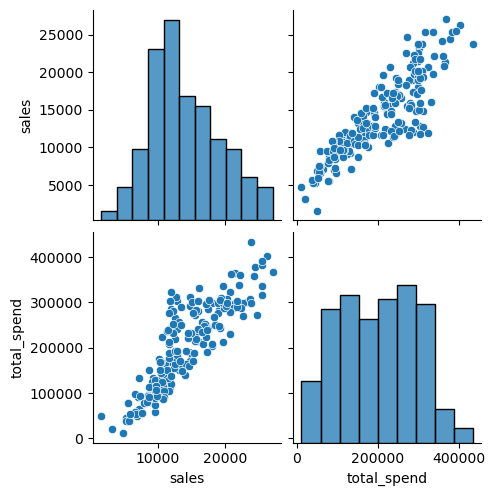

                sales  total_spend
sales        1.000000     0.867712
total_spend  0.867712     1.000000
     total_spend
146       256100
169       301300
145       151200
55        308300
21        266000
..           ...
56         76800
182        91600
199       249400
92        310200
126        97300

[160 rows x 1 columns] 146    13200
169    15000
145    10300
55     23700
21     12500
       ...  
56      5500
182     8700
199    13400
92     19400
126     6600
Name: sales, Length: 160, dtype: int64      total_spend
84        290300
60         76900
54        307400
109       287800
156       187900
140       103300
39        297700
116       179100
123       170100
53        287500
103       223000
101       433600
158        93800
3         251300
100       276500
27        279700
163       207700
174       238900
37        169800
69        287900
131       311100
196       107200
190        86400
23        271400
198       391800
17        376800
32        128700
31       

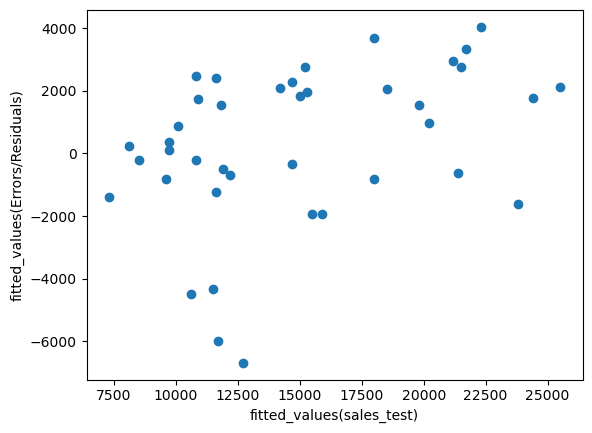

----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           5.06e-62
Time:                        14:58:13   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


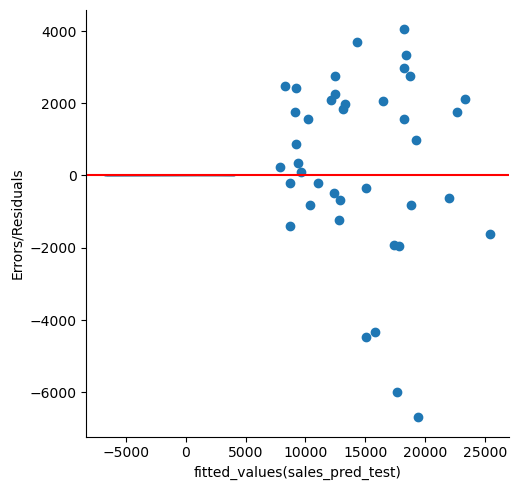

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step-1: Understand Business Problem

# Step-2: Data Understanding

df = pd.read_csv("advertising.csv")
print(df)
print("-"*100)

print(df.info())    # ---> It will give overview about dataset
print("-"*100)

df['TV'].unique()   # ---> It will all unique values in given column
df["radio"].unique()
df["newspaper"].unique()
    # From this we can say that all columns have unique values only

# But we need total spend on advertising not individual spend
# so, total_spend = TV + radio + newspaper,  we should create a new column with total_spend as name of column
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]
print(df)
print("-"*100)

# But we don't need the individual idvertising money spend columns i.e. TV, radio, newspaper. We should drop them
df.drop(columns=["TV","radio","newspaper"],inplace=True)
print(df)
print("-"*100)

# So, now we have only two columns total_spend column as input variable & sales as output variable. We should describe them
print(df.describe())   # ---> It will give mean,min,max,quartiles,count,... of both the columns from that we can desribe that how's the data is varies in columns
print("-"*100)

sns.pairplot(df)       # ---> It will show the pairplot graphs of columns, from that we can desribe that how's the data is varies in columns with respect to each other
plt.show()

print(df.corr())       # ---> It will gives the corelation between two coulumns total_spend and sales
print("="*100)


# Step-3: Data Preprocessing

# Data Cleaning:
# Both columns are int datatypes, so wrong values are not there.
# Both columns having unique 200 records, so no duplicates are there.
df.duplicated().sum()  # ---> It will give count of total no. of duplicates in dataset columns

# Both columns have 200 entries, so no missing record is there
df.isnull().sum()      # ---> It will give count of total no. of missing records in dataset columns

# Data Wrangling:
# In this dataset both columns are continous variables, and there no need of converting them into discrete variables, so no need of Data Wrangling

X = df[["total_spend"]]
y = df["sales"]

# Step-4: Split the dataset into two parts:

from sklearn.model_selection import train_test_split
total_spend_train,total_spend_test,sales_train,sales_test = train_test_split(X,y,train_size=0.8,random_state=9)
print(total_spend_train,sales_train,total_spend_test,sales_test)
print("-"*100)

# Modelling:
from sklearn.linear_model import LinearRegression
# save the model
model = LinearRegression()

# Fit the model- train machine by using Train data
model.fit(total_spend_train,sales_train)

print("Coefficient(B1) =", model.coef_)
print("Intercept(B0) =", model.intercept_)
print("="*100)

# Step-5:- Prediction:
sales_pred_train = model.predict(total_spend_train)
print("sales_pred_train:",sales_pred_train)
sales_pred_test = model.predict(total_spend_test)
print("sales_pred_test:",sales_pred_test)
print("-"*100)

# Evaluation:
from sklearn.metrics import mean_absolute_error
MAE_train = mean_absolute_error(sales_train,sales_pred_train)
print('MAE_train',MAE_train)
MAE_test = mean_absolute_error(sales_test,sales_pred_test)
print('MAE_test',MAE_test)
print("-"*100)

from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(sales_train,sales_pred_train)
print("MSE_train",MSE_train)
MSE_test = mean_squared_error(sales_test,sales_pred_test)
print("MSE_test",MSE_test)
print("-"*100)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train",RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_test",RMSE_test)
print("="*100)

# Step-6:- Model Selection:

# Condition-1: check train_accuracy == test_ accuracy
train_accuracy = model.score(total_spend_train,sales_train)  # ---> It will give R2_train
print("train_accuracy:",train_accuracy)
test_accuracy = model.score(total_spend_test,sales_test)     # ---> It will give R2_test
print("test_accuracy",test_accuracy)
print("-"*100)

# Condition-2: Check test_accuracy == cross_validation_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print(scores)

cross_validation_score = scores.mean()
print("cross_validation_score:",cross_validation_score)
print("-"*100)

# Condition-3: Check whether the model(identified equation) is good for Business Problem or not 
            # Here, there no accuracy requirement is there so this model is good for this Business Problem
    
# Condition-4: (Only for Linear Regression)
              # Check for Assumptions

# 1) Linearity of Errors: Check residuals(errors) are linear or not 
error = sales_test-sales_pred_test
plt.scatter(sales_test,error)
plt.xlabel("fitted_values(sales_test)")
plt.ylabel("fitted_values(Errors/Residuals)")
plt.show()
print("-"*100)

# 2) Independence of Errors(Variables Significance): Check whether one error is independent of other or not
                                                    #( output variable should not be dependent on errors occurs)
import statsmodels.formula.api as smf
model2 = smf.ols("y~X",data=df).fit()
print(model2.summary())
print("-"*100)

# 3) Normality of Errors: Check whether the errors are normally distributed or not
error.skew()
sns.displot(error,kde=True)
print("-"*100)

# 4) Equal Variance of Errors(Homoscadescity): Check How the errors are disperse(deviated) from mean of errors(i.e.Zero)
plt.scatter(sales_pred_test,error)
plt.axhline(y=0,color="red")
plt.xlabel("fitted_values(sales_pred_test)")
plt.ylabel("Errors/Residuals")
plt.show()
print("="*100)